## Student Performance Indicator

Life cycle of Machine Learning Project
1. Understanding the problem statement
2. Data Collection
3. Data Checks to perform
4. Data pre-processing
5. Model Training
6. Choose Best Model

### 1)  Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('/home/neuriot/raj/mlproject/notebook/data/StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

Data Checks to Perform
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. check statistics of data set
6. check various categories present in the different categorical column

In [8]:
# missing value
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# check duplicates
df.duplicated().sum(
    
)

0

In [10]:
# check NUll and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# checking the number of unique values of each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
# check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
# Exploring Data

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
print("categories in 'gender' variable:    ",end = " ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end = " ")
print(df['race/ethnicity'].unique())


print("categories in 'parental level of education' variable:    ",end = " ")
print(df['parental level of education'].unique())


categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [20]:
# define numerical and categorical columns

numeric_feature = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

print("We have {} Numerical feature {}".format(len(numeric_feature),numeric_feature))
print("We have {} categorical feature {}".format(len(categorical_feature),categorical_feature))

We have 3 Numerical feature ['math score', 'reading score', 'writing score']
We have 5 categorical feature ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
# making new columns 'Total Score' and 'Average' 
df['total_score'] = df['math score'] + df['reading score']  + df['writing score']
df['average score'] = (df['math score'] + df['reading score']  + df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


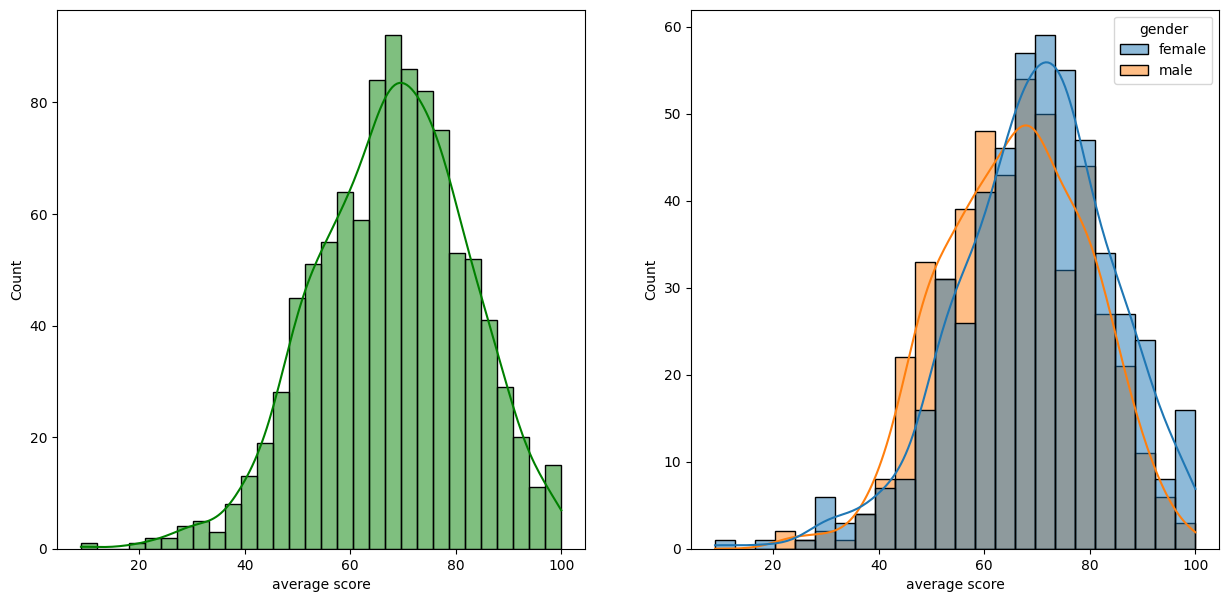

In [34]:
# visualize average score distribution to , fmake some conclusion.
# 1. Histogram
# 2. Kernel Distribution Function (KDE)

fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)

sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)

sns.histplot(data = df,x = 'average score',kde = True,hue = 'gender')
plt.show()

<Axes: xlabel='average score', ylabel='Count'>

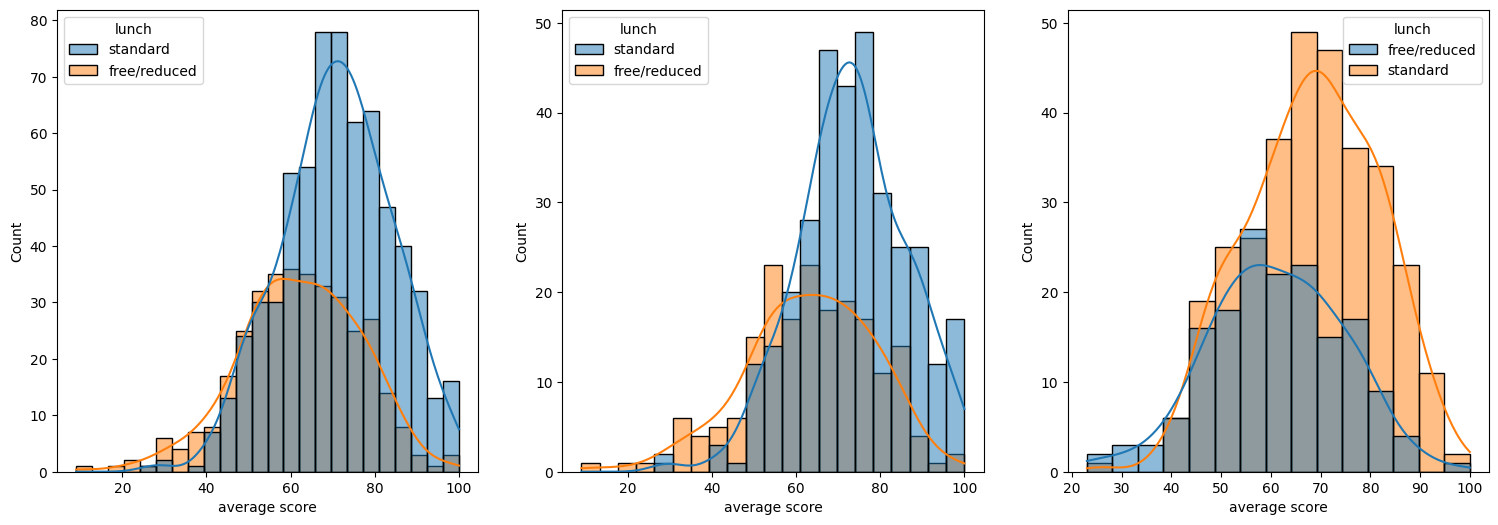

In [41]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)

sns.histplot(data = df,x = 'average score',kde = True,hue = 'lunch')
plt.subplot(142)

sns.histplot(data = df[df.gender =='female'],x = 'average score',kde = True,hue = 'lunch')
plt.subplot(143)

sns.histplot(data = df[df.gender =='male'],x = 'average score',kde = True,hue = 'lunch')
plt.subplot(143)

In [42]:
# need to some remaining analysis